In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from time import time
warnings.filterwarnings(action='ignore')
import tensorflow as tf

# 데이터 불러오기

In [2]:
data = pd.read_csv('data_file_csv_final.csv', encoding='utf-8')
data.drop(columns=["Unnamed: 0"],inplace=True)
data

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,startplus,endplus,gotowork,gotoschool,gotocharge,end_destination
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,25,3,135,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,7569,7469,0,0,0,0.0
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,20,203,9,83,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,7568,7469,0,0,0,0.0
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,15,271,15,124,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,7670,7670,0,0,0,0.0
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,11,78,4,238,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,7570,7571,0,0,0,0.0
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,11,49,14,280,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,7670,7570,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,3573,중형 승합,2022-05-09 오전 7:00:28,2022-05-09 오전 7:08:36,2022-05-09 오전 7:29:07,4,290,22,175,2022/05/09 7:00,...,37.55,127.13,37.57,127.01,7571,7570,0,0,0,0.0
2068,8276,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:23:59,2022-05-09 오전 7:38:06,19,147,13,22,2022/05/09 7:01,...,37.52,126.90,37.57,126.93,7569,7569,0,0,0,0.0
2069,3602,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:26:08,2022-05-09 오전 7:37:38,20,252,20,289,2022/05/09 7:01,...,37.49,126.85,37.50,126.88,7468,7568,0,0,0,0.0
2070,8209,중형승합,2022-05-09 오전 7:01:00,2022-05-09 오전 8:07:22,2022-05-09 오전 8:36:50,24,255,7,29,2022/05/09 7:01,...,37.54,126.84,37.56,126.90,7568,7569,0,0,0,0.0


# 모델 생성 과정(Train/Test Split, Hyperparameter Tuning)

In [3]:
x=np.array(data.loc[: ,['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']])
y=data['endplus']
#  data train,test로 나누기
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.1, random_state=42, shuffle=False)
print(x_train.shape)
print(x_test.shape)

(1864, 6)
(208, 6)


In [4]:
#임의로 각 모델을 정의하기
#아래로직을 통해 재정의를 함
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()

In [5]:
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
t_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state = 10), 
    tree_params, 
    cv=10
)

In [6]:
#### hyperparameter를 여러개로 바꿔서 
#다시 KNeighborsClassifier 수행하기
k_params = {
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
k_grid_search = GridSearchCV(
    estimator=knn_clf, 
    param_grid=k_params, 
    n_jobs=-1, 
    cv=10,
    verbose = 1
)

In [7]:
#### hyperparameter를 여러개로 바꿔서 
#다시 RandomforestClassifier 수행하기
r_params = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0, 10]
}
r_grid_search = GridSearchCV(
    estimator=rf_clf, 
    param_grid=r_params, 
    n_jobs=-1, 
    cv=10
)

In [8]:
#### hyperparameter를 여러개로 바꿔서 
#다시 adaboost 수행하기

d_grid_result = t_grid_search.fit(x_train,y_train)
print(t_grid_search.best_params_)
best_d_clf = t_grid_search.best_estimator_
best_d_clf.fit(x_train, y_train)

ada_params = {
    'n_estimators' : [10,20,50,100],
    'learning_rate' : [0.1,0.2]
}
ada_grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(
        base_estimator=best_d_clf,
        n_estimators=10,
        learning_rate=0.1), 
    param_grid=ada_params, 
    n_jobs=-1, 
    cv=10,
    scoring='accuracy'
)

{'criterion': 'entropy', 'max_depth': 15}


In [9]:
#### hyperparameter를 여러개로 바꿔서 
#다시 gradientboost 수행하기
gb_params = {
    'n_estimators' : [10,20,50,100],
    'learning_rate' : [0.1,0.2]
}
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 10), 
    param_grid=gb_params, 
    n_jobs=-1, 
    cv=10,
    scoring='accuracy'
)

In [10]:
#kneighbor 다시 적용
k_grid_result = k_grid_search.fit(x_train,y_train)
print(k_grid_search.best_params_)
best_k_clf = k_grid_search.best_estimator_
best_k_clf.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [11]:
#randomforest 다시 적용
r_grid_result = r_grid_search.fit(x_train,y_train)
print(r_grid_search.best_params_)
best_r_clf = r_grid_search.best_estimator_
best_r_clf.fit(x_train, y_train)

{'max_depth': 12, 'n_estimators': 330, 'random_state': 10}


RandomForestClassifier(max_depth=12, n_estimators=330, random_state=10)

In [12]:
#adaboost 다시 적용
ada_grid_result = ada_grid_search.fit(x_train,y_train)
print(ada_grid_search.best_params_)
best_ada_clf = ada_grid_search.best_estimator_
best_ada_clf.fit(x_train, y_train)

{'learning_rate': 0.1, 'n_estimators': 10}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15,
                                                         random_state=10),
                   learning_rate=0.1, n_estimators=10)

In [13]:
#gradientboost 다시 적용
gb_grid_result = gb_grid_search.fit(x_train,y_train)
print(gb_grid_search.best_params_)
best_gb_clf = gb_grid_search.best_estimator_
best_gb_clf.fit(x_train, y_train)

{'learning_rate': 0.2, 'n_estimators': 100}


GradientBoostingClassifier(learning_rate=0.2, random_state=10)

In [14]:
vo_clf = VotingClassifier(estimators=[("RF", best_r_clf),
                                        ("AC", best_ada_clf),
                                        ("KN", best_k_clf),
                                        ("GN", best_gb_clf)], voting="soft")

In [15]:
# 정확도 
classifiers = [ best_r_clf, best_ada_clf, best_gb_clf, best_k_clf, vo_clf ]
pred_final = []
accuracy_store = []
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    name = classifier.__class__.__name__
    print("{}의 예측 정확도 : {}".format(name, 
                                   round(accuracy_score(y_test, pred), 3)))
    pred_final.append(pred)
    accuracy_store.append(accuracy_score(y_test, pred))
pred_final = np.transpose(pred_final)
print("Stacking 이전 일반모델들의 예측 정확도 평균 : {}"
      .format(round(np.mean(accuracy_store), 3)))
print("Stacking 이전 일반모델 중 예측 정확도 높은 모델 : {}"
      .format(round(np.max(accuracy_store), 3)))

RandomForestClassifier의 예측 정확도 : 0.635
AdaBoostClassifier의 예측 정확도 : 0.683
GradientBoostingClassifier의 예측 정확도 : 0.678
KNeighborsClassifier의 예측 정확도 : 0.654
VotingClassifier의 예측 정확도 : 0.692
Stacking 이전 일반모델들의 예측 정확도 평균 : 0.668
Stacking 이전 일반모델 중 예측 정확도 높은 모델 : 0.692


## Stacking실시

In [16]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성
accuracy_total = []
def get_stacking_base_datasets(model, X_train_n, y_train_n
                               , X_test_n, n_folds ):
    n_iter = 0
    kfold = KFold(n_splits = n_folds)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    #print(model.__class__.__name__ , ' model 시작 ')
    for train_idx, test_idx in kfold.split(X_train_n) :
        x_tr, x_te = X_train_n[train_idx], X_train_n[test_idx]
        y_tr, y_te = y_train_n[train_idx], y_train_n[test_idx]
        #print('폴드 세트: ',n_iter,' 시작 ')
        model.fit(x_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 
        #기반 모델 예측 후 데이터 저장.
        train_fold_pred[test_idx, :] = model.predict(x_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 
        #예측 후 데이터 저장. 
        test_pred[:, n_iter] = model.predict(X_test_n)
        n_iter += 1
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [36]:
# 모델 돌리기 함수
def get_predict_datasets(x_test):
    # CV스태킹 알고리즘 각 모델에 적용
    rf_train, rf_test = get_stacking_base_datasets(best_r_clf, x_train,
                                               y_train, x_test, 10)
    kn_train, kn_test = get_stacking_base_datasets(best_k_clf, x_train, 
                                                 y_train, x_test, 10) 
    ab_train, ab_test = get_stacking_base_datasets(best_ada_clf, x_train, 
                                                 y_train, x_test, 10) 
    gn_train, gn_test = get_stacking_base_datasets(best_gb_clf, x_train, 
                                                 y_train, x_test, 10) 
    vo_train, vo_test = get_stacking_base_datasets(vo_clf, x_train, 
                                                 y_train, x_test, 10) 
    # CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 
    # result_a result_b 만들기 
    Stack_final_X_train = np.concatenate((rf_train, kn_train, 
                                          ab_train, gn_train, vo_train),
                                     axis=1)
    Stack_final_X_test = np.concatenate((rf_test, kn_test,
                                         ab_test, gn_test, vo_test), 
                                     axis=1)
    return Stack_final_X_train, Stack_final_X_test

In [37]:
# 모델 완성시키는 함수
def Model(sfxtr, sfxte):
    best_r_clf.fit(sfxtr, y_train)
    best_ada_clf.fit(sfxtr, y_train)
    best_k_clf.fit(sfxtr, y_train)
    best_gb_clf.fit(sfxtr, y_train)
    vo_clf.fit(sfxtr, y_train)

    #  개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
    PredictModel = VotingClassifier(estimators=[("RF", best_r_clf),
                                                ("AC", best_ada_clf),
                                                ("KN", best_k_clf),
                                                ("GN", best_gb_clf),
                                                ("VO", vo_clf)
                                               ], voting="soft")
    PredictModel.fit(sfxtr, y_train)
    predict_in = PredictModel.predict(sfxte)
    return predict_in

# 메타모델 생성 후 정확도 시각화

In [38]:
sfxtr, sfxte = get_predict_datasets(x_test)

In [39]:
res = Model(sfxtr, sfxte)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(
    accuracy_score(y_test, res)))

최종 메타 모델의 예측 정확도: 0.6394


In [40]:
print(res)

[7468 7669 7571 7570 7569 7568 7569 7568 7569 7670 7670 7569 7669 7569
 7569 7569 7569 7468 7570 7569 7669 7670 7571 7670 7471 7569 7670 7670
 7471 7669 7568 7570 7569 7570 7570 7568 7569 7669 7569 7571 7568 7471
 7569 7670 7568 7568 7669 7570 7669 7571 7568 7569 7571 7669 7568 7568
 7568 7568 7568 7670 7568 7471 7571 7569 7569 7471 7571 7570 7571 7569
 7570 7569 7568 7568 7470 7470 7570 7571 7470 7670 7568 7670 7568 7569
 7568 7571 7568 7569 7570 7469 7670 7568 7568 7570 7570 7670 7568 7570
 7469 7669 7569 7469 7570 7670 7568 7568 7569 7569 7570 7670 7568 7571
 7670 7670 7569 7569 7469 7569 7568 7569 7569 7670 7571 7670 7471 7469
 7470 7571 7569 7569 7570 7470 7571 7670 7471 7470 7569 7670 7670 7471
 7670 7569 7670 7568 7670 7571 7571 7669 7471 7571 7570 7670 7568 7569
 7569 7569 7471 7669 7569 7669 7670 7571 7569 7669 7569 7569 7568 7568
 7571 7568 7569 7570 7670 7669 7670 7568 7670 7570 7571 7569 7568 7570
 7570 7571 7569 7471 7669 7570 7571 7569 7571 7570 7568 7568 7571 7470
 7670 

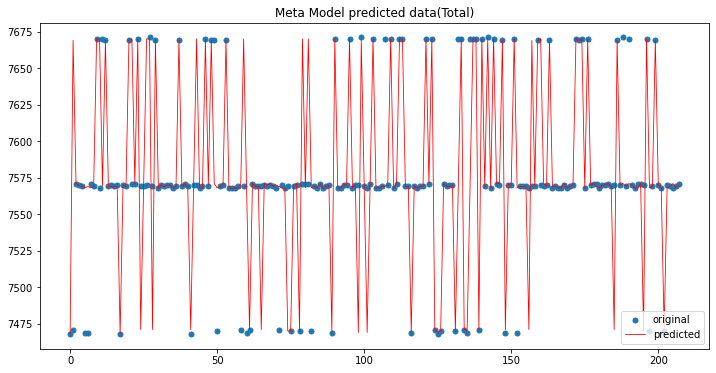

In [41]:
x_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (12,6)
plt.scatter(x_ax, y_test, label="original", alpha = 1, s = 5**2)
plt.plot(x_ax, res, lw=0.8, color="red", label="predicted")
plt.title("Meta Model predicted data(Total)")
plt.legend()
plt.show()

# 예측모델 결과

In [42]:
Test_Predict = pd.DataFrame({
    'PassengerDestination' : y_test,
    'predict' : res,
    'Success' : res == y_test
})
Test_Predict['Success'].value_counts()

True     133
False     75
Name: Success, dtype: int64

In [43]:
Test_Predict[:30]

,PassengerDestination,predict,Success
1864,7468,7468,True
1865,7471,7669,False
1866,7571,7571,True
1867,7570,7570,True
1868,7569,7569,True
1869,7469,7568,False
1870,7469,7569,False
1871,7571,7568,False
1872,7569,7569,True
1873,7670,7670,True


# 예측모델로 임의의 예측행렬 대입 시 결과확인

>'end_destination', 'startplus', 'receipt-ride','hour', 'startpos1', 'startpos2' 순으로 대입하면 예측결과를 얻을 수 있음
>>사용할 때 아래 코드를 통해 값을 살펴보길 바람

In [44]:
end_destination_describe = list(data['end_destination'].unique())
startplus_describe = list(data['startplus'].unique())
receipt_ride_describe = list(data['receipt-ride'].unique())
hour_describe = list(data['hour'].unique())
startpos1_describe = list(data['startpos1'].unique())
startpos2_describe = list(data['startpos2'].unique())
print('목적지값목록 : ', end_destination_describe)
print('출발지점값목록 : ', startplus_describe)
print('이용시간값목록 : ', receipt_ride_describe)
print('콜부른시간값목록 : ', hour_describe)
print('출발지(구)값목록 : ', startpos1_describe)
print('출발지(동)값목록 : ', startpos2_describe)

목적지값목록 :  [0.0, 2.0, 1.0, 3.0]
출발지점값목록 :  [7569, 7568, 7670, 7570, 7469, 7471, 7671, 7571, 7468, 7669, 7470, 7578, 7588, 7598, 7508, 7518, 7528, 7538, 7548]
이용시간값목록 :  [22, 38, 45, 1, 75, 42, 89, 69, 87, 33, 49, 43, 92, 37, 26, 15, 16, 25, 29, 13, 50, 14, 12, 3, 6, 21, 17, 19, 18, 27, 20, 23, 24, 31, 36, 40, 46, 48, 9, 11, 44, 8, 30, 28, 32, 34, 39, 10, 64, 41, 61, 35, 5, 7, 62, 70, 54, 55, 60, 56, 2, 65, 4, 91, 63, 74, 85, 52, 82, 57, 53, 59, 99, 51, 86, 58, 94, 47, 0, 111, 103, 112, 71, 77, 81, 96, 98, 79, 67, 83, 68, 114, 73, 80, 66, 72, 76, 88, 101, 121, 78, 95]
콜부른시간값목록 :  [0, 1, 2, 3, 4, 5, 7, 8, 9, 6]
출발지(구)값목록 :  [19, 20, 15, 11, 18, 5, 21, 3, 10, 7, 9, 24, 8, 6, 23, 1, 13, 4, 2, 16, 12, 0, 14, 17, 22]
출발지(동)값목록 :  [25, 203, 271, 78, 49, 291, 285, 144, 23, 170, 157, 148, 130, 126, 163, 312, 317, 238, 86, 129, 136, 133, 42, 160, 171, 40, 125, 82, 213, 45, 1, 286, 65, 26, 308, 31, 117, 195, 240, 137, 295, 301, 37, 272, 24, 226, 335, 12, 196, 173, 194, 218, 221, 235, 275, 190, 16,

In [45]:
tic = time()
x_test_list = [0, 7570, 35, 7, 12, 271]
input_Array = np.asarray(x_test_list)
input_reshape = input_Array.reshape(1, -1)
sfxtr_input, sfxte_input = get_predict_datasets(input_reshape)
res_analysis = Model(sfxtr_input, sfxte_input)
print('예측결과 : {}'.format(res_analysis))
print("Model RunningTime done in {:.3f}s".format(time()-tic))

예측결과 : [7671]
Model RunningTime done in 115.399s
